In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import pandas as pd


df = pd.read_csv("bcs class 2 database.csv", encoding='latin1')  
# OR
df = pd.read_csv("bcs class 2 database.csv", encoding='cp1252')  
# OR
df = pd.read_csv("bcs class 2 database.csv", encoding='ISO-8859-1')

In [43]:
df.shape

(98, 8)

In [45]:
df.head()

Drug Name  Molecular Weight (g/mol)  pKa  LogP  \
0  Aceclofenac                    354.18    4  3.58   
1    Acitretin                    326.42  3.8   6.1   
2  Albendazole                    265.34  7.4   2.9   
3   Amiodarone                    645.29  4.5   4.1   
4   Aprepitant                    534.44    4   4.2   

  Aqueous Solubility (mg/mL) Oral Bioavailability (%)  H-Bond Donors  \
0                    0.00744                       15            3.0   
1                     0.0729                       45            1.0   
2                      0.001                       56            2.0   
3                        0.1                       14            3.0   
4                      0.009                       67            2.0   

   H-Bond Acceptors  
0               5.0  
1               3.0  
2               4.0  
3               6.0  
4              12.0

In [47]:
df.sample()

Drug Name  Molecular Weight (g/mol)  pKa  LogP Aqueous Solubility (mg/mL)  \
64  Maribavir                    308.78  3.5  ~2.5                        Low   

   Oral Bioavailability (%)  H-Bond Donors  H-Bond Acceptors  
64                     ~30%            1.0               5.0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Drug Name                   98 non-null     object 
 1   Molecular Weight (g/mol)    98 non-null     float64
 2   pKa                         85 non-null     object 
 3   LogP                        94 non-null     object 
 4   Aqueous Solubility (mg/mL)  94 non-null     object 
 5   Oral Bioavailability (%)    92 non-null     object 
 6   H-Bond Donors               95 non-null     float64
 7   H-Bond Acceptors            95 non-null     float64
dtypes: float64(3), object(5)
memory usage: 6.3+ KB


In [51]:
df.describe()

Molecular Weight (g/mol)  H-Bond Donors  H-Bond Acceptors
count                 98.000000      95.000000         95.000000
mean                 437.999510       1.505263          5.094737
std                  161.072474       0.955095          1.951942
min                  169.560000       0.000000          2.000000
25%                  329.477500       1.000000          4.000000
50%                  407.945000       1.000000          5.000000
75%                  493.155000       2.000000          6.000000
max                 1157.340000       5.000000         12.000000

In [53]:
df.duplicated().sum()

0

In [55]:
df.isnull().sum()

Drug Name                      0
Molecular Weight (g/mol)       0
pKa                           13
LogP                           4
Aqueous Solubility (mg/mL)     4
Oral Bioavailability (%)       6
H-Bond Donors                  3
H-Bond Acceptors               3
dtype: int64

In [57]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("bcs class 2 database.csv", encoding='latin1')  
# OR
df = pd.read_csv("bcs class 2 database.csv", encoding='cp1252')  
# OR
df = pd.read_csv("bcs class 2 database.csv", encoding='ISO-8859-1')

# Clean non-numeric characters (e.g., ranges, "<", ">")
def clean_numeric(col):
    return pd.to_numeric(
        col.str.replace("[^0-9.]", "", regex=True)  # Remove non-numeric chars
        .str.split("-").str[0],  # Take the first value if a range is given (e.g., "4.5-5.0" → 4.5)
        errors="coerce"  # Convert invalid values to NaN
    )

# Apply cleaning to problematic columns
df["pKa"] = clean_numeric(df["pKa"])
df["LogP"] = clean_numeric(df["LogP"])
df["Aqueous Solubility (mg/mL)"] = clean_numeric(df["Aqueous Solubility (mg/mL)"])
df["Oral Bioavailability (%)"] = clean_numeric(df["Oral Bioavailability (%)"])

In [59]:
# Drop rows with missing critical features (e.g., pKa, LogP)
df = df.dropna(subset=["pKa", "LogP", "H-Bond Donors", "H-Bond Acceptors"])

# Impute remaining missing values with median (for numeric columns)
numeric_cols = ["Molecular Weight (g/mol)", "pKa", "LogP", 
                "Aqueous Solubility (mg/mL)", "Oral Bioavailability (%)",
                "H-Bond Donors", "H-Bond Acceptors"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [61]:
# Create H-bond total (donors + acceptors)
df["H-Bond Total"] = df["H-Bond Donors"] + df["H-Bond Acceptors"]

# Create solubility-per-logP ratio (indicates solubility vs. lipophilicity)
df["Solubility/LogP"] = df["Aqueous Solubility (mg/mL)"] / df["LogP"]

In [81]:
# Example: Assume co-crystals improve solubility; label drugs with solubility < X as needing co-crystals
df["CoCrystal_Formed"] = (df["Aqueous Solubility (mg/mL)"] < 0.1).astype(int)

In [83]:
df.describe()

Molecular Weight (g/mol)        pKa       LogP  \
count                 82.000000  82.000000  82.000000   
mean                 442.724049   6.275000   3.592927   
std                  168.140644   2.986329   1.441266   
min                  169.560000   1.100000   0.300000   
25%                  329.477500   4.000000   2.525000   
50%                  406.975000   4.800000   3.500000   
75%                  499.625000   8.150000   4.465000   
max                 1157.340000  14.980000   8.050000   

       Aqueous Solubility (mg/mL)  Oral Bioavailability (%)  H-Bond Donors  \
count                   82.000000                 82.000000      82.000000   
mean                     0.503520                363.768293       1.524390   
std                      2.430868               1486.772694       0.984141   
min                      0.000000                  2.000000       0.000000   
25%                      0.010000                 36.250000       1.000000   
50%                      0.020000                 60.000000       1.000000   
75%                      0.037500                 83.750000       2.000000   
max                     20.000000               9095.000000       5.000000   

       H-Bond Acceptors  H-Bond Total  Solubility/LogP  CoCrystal_Formed  
count         82.000000     82.000000        82.000000         82.000000  
mean           5.158537      6.682927         0.185543          0.792683  
std            2.027402      2.734679         0.936508          0.407879  
min            2.000000      2.000000         0.000000          0.000000  
25%            4.000000      5.000000         0.002516          1.000000  
50%            5.000000      6.000000         0.005882          1.000000  
75%            6.000000      8.000000         0.014017          1.000000  
max           12.000000     17.000000         8.000000          1.000000

In [85]:
print(df.columns.tolist())

['Drug Name', 'Molecular Weight (g/mol)', 'pKa', 'LogP', 'Aqueous Solubility (mg/mL)', 'Oral Bioavailability (%)', 'H-Bond Donors', 'H-Bond Acceptors', 'H-Bond Total', 'Solubility/LogP', 'CoCrystal_Formed']


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target (replace "CoCrystal_Formed" with your actual target column)
features = [
    "Molecular Weight (g/mol)", "pKa", "LogP", "Aqueous Solubility (mg/mL)",
    "Oral Bioavailability (%)", "H-Bond Donors", "H-Bond Acceptors",
    "H-Bond Total", "Solubility/LogP"
]
X = df[features]
y = df["CoCrystal_Formed"]  # Replace with your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        14

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



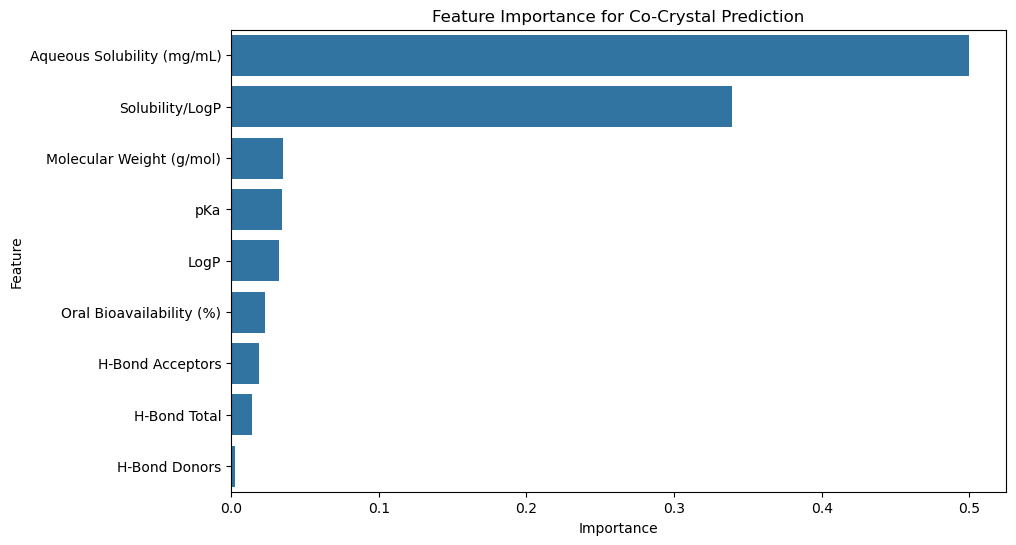

In [89]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance for Co-Crystal Prediction")
plt.show()

C:\Users\Shalu Verma\AppData\Local\Temp\ipykernel_7728\1690796193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CoCrystal_Formed', data=df, palette='viridis')


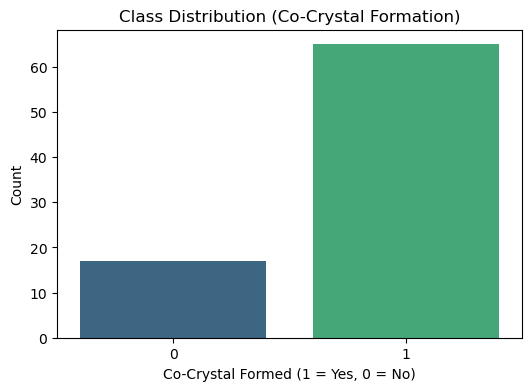

In [91]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CoCrystal_Formed', data=df, palette='viridis')
plt.title('Class Distribution (Co-Crystal Formation)')
plt.xlabel('Co-Crystal Formed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

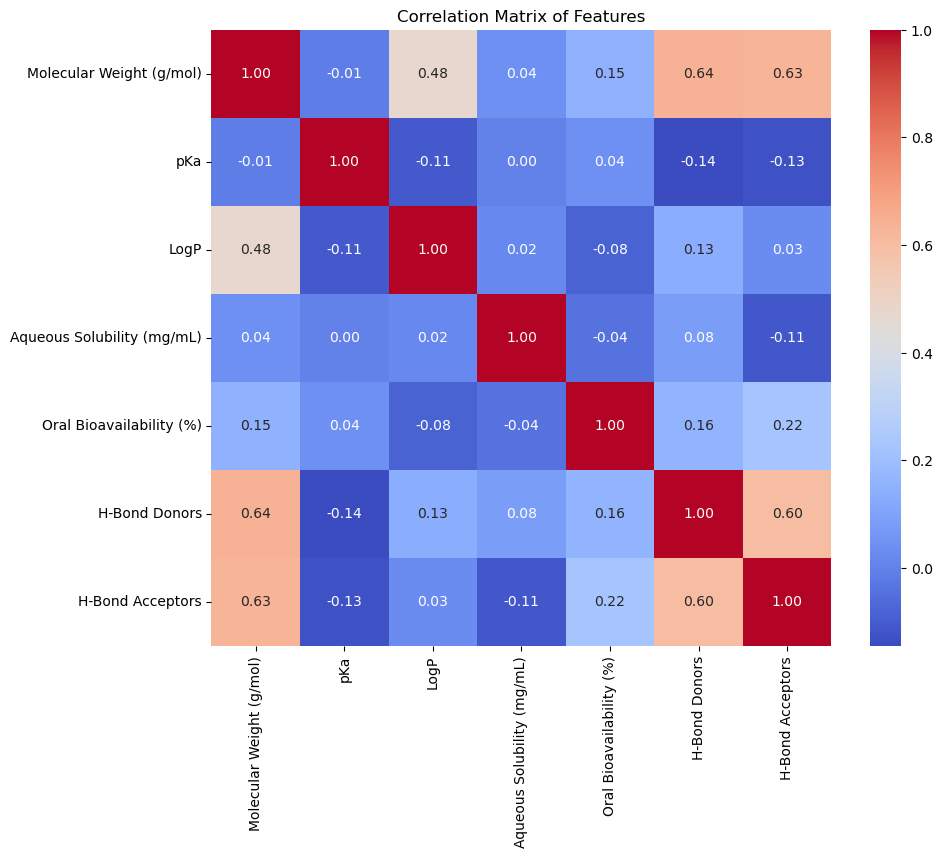

In [93]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

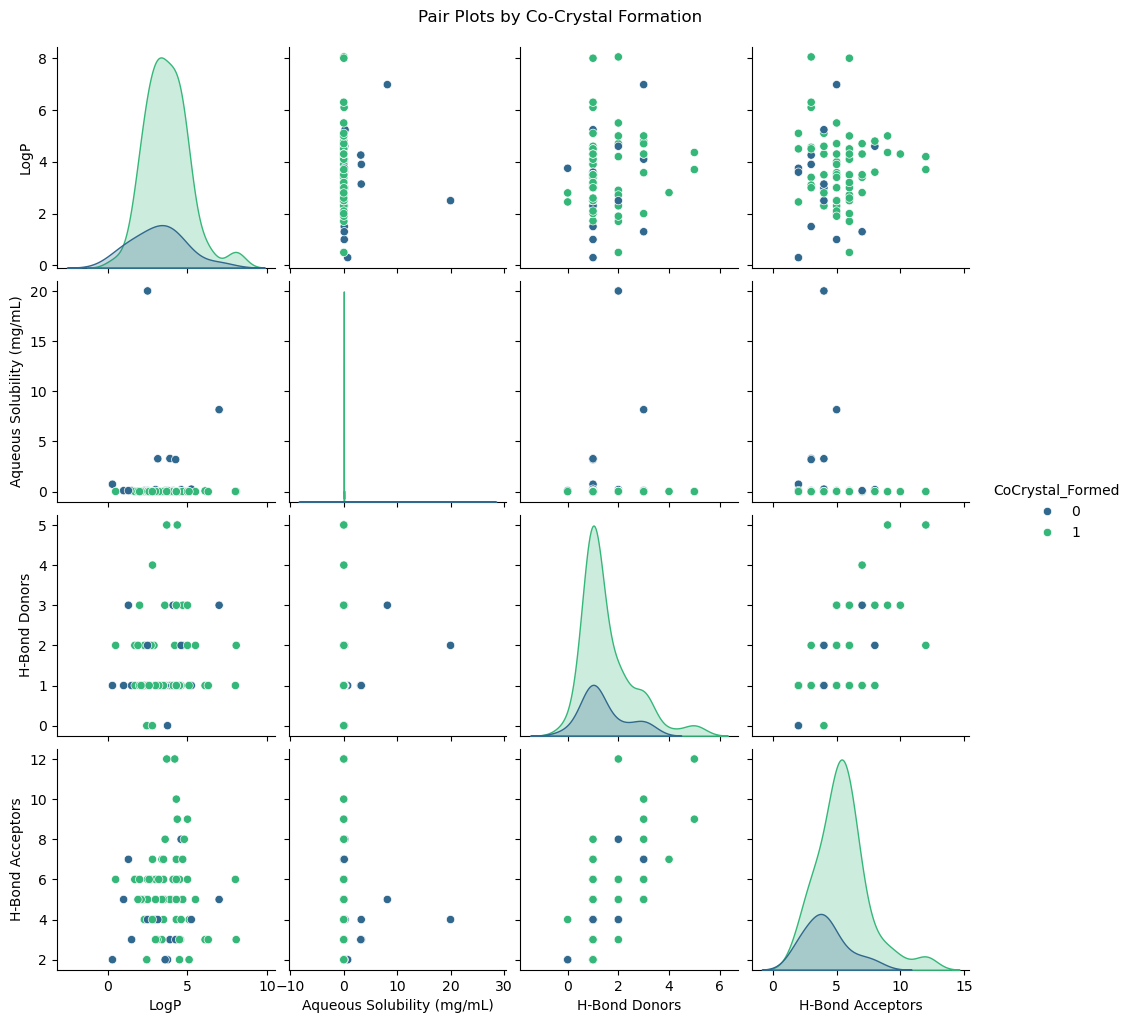

In [95]:
sns.pairplot(df[['LogP', 'Aqueous Solubility (mg/mL)', 'H-Bond Donors', 'H-Bond Acceptors', 'CoCrystal_Formed']], 
             hue='CoCrystal_Formed', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plots by Co-Crystal Formation', y=1.02)
plt.show()

C:\Users\Shalu Verma\AppData\Local\Temp\ipykernel_7728\2970371252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoCrystal_Formed', y='LogP', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\Shalu Verma\AppData\Local\Temp\ipykernel_7728\2970371252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoCrystal_Formed', y='Aqueous Solubility (mg/mL)', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Shalu Verma\AppData\Local\Temp\ipykernel_7728\2970371252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoCrystal_Formed',

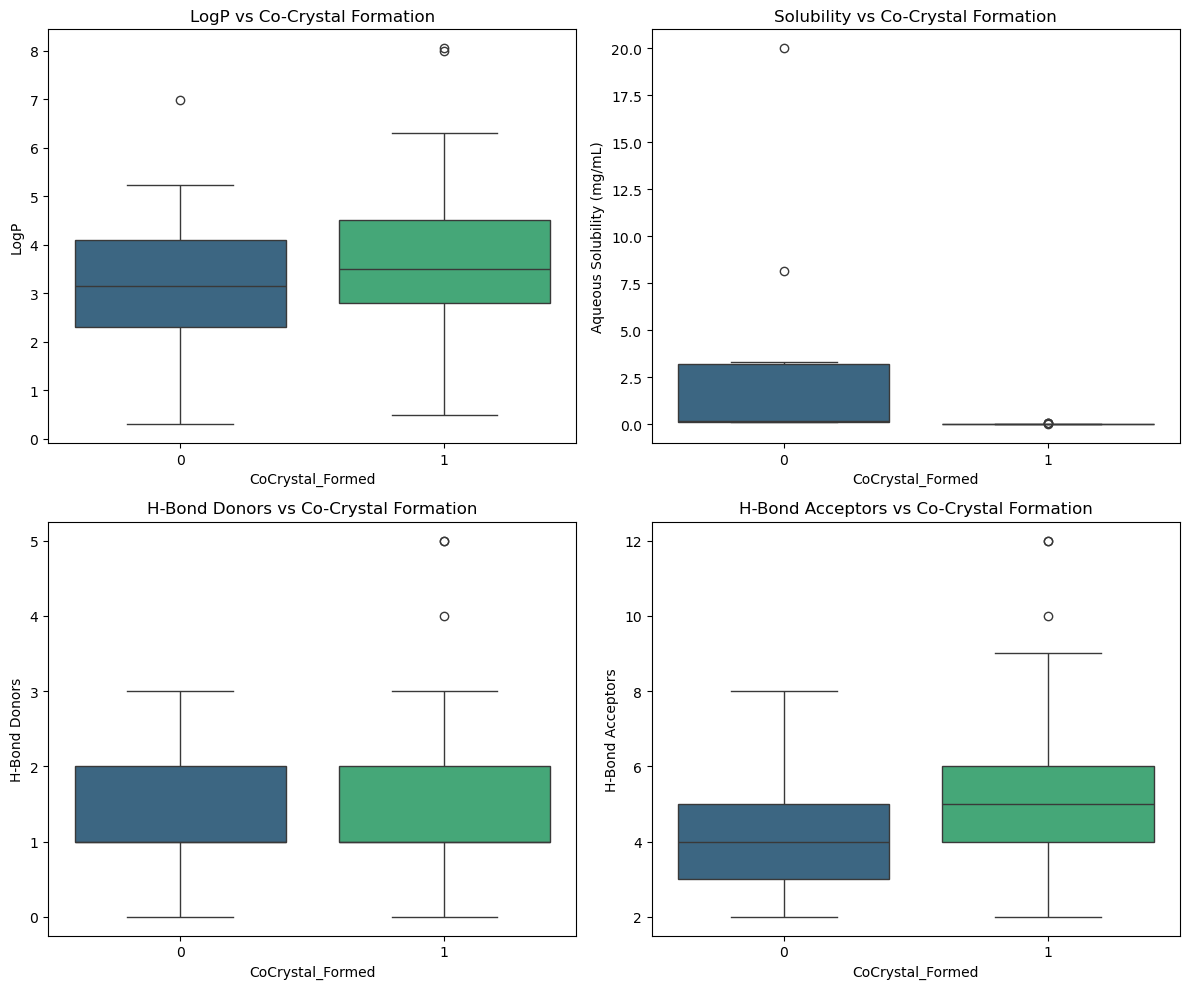

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='CoCrystal_Formed', y='LogP', data=df, ax=axes[0, 0], palette='viridis')
sns.boxplot(x='CoCrystal_Formed', y='Aqueous Solubility (mg/mL)', data=df, ax=axes[0, 1], palette='viridis')
sns.boxplot(x='CoCrystal_Formed', y='H-Bond Donors', data=df, ax=axes[1, 0], palette='viridis')
sns.boxplot(x='CoCrystal_Formed', y='H-Bond Acceptors', data=df, ax=axes[1, 1], palette='viridis')

axes[0, 0].set_title('LogP vs Co-Crystal Formation')
axes[0, 1].set_title('Solubility vs Co-Crystal Formation')
axes[1, 0].set_title('H-Bond Donors vs Co-Crystal Formation')
axes[1, 1].set_title('H-Bond Acceptors vs Co-Crystal Formation')

plt.tight_layout()
plt.show()

C:\Users\Shalu Verma\AppData\Local\Temp\ipykernel_7728\2914948253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette='viridis')


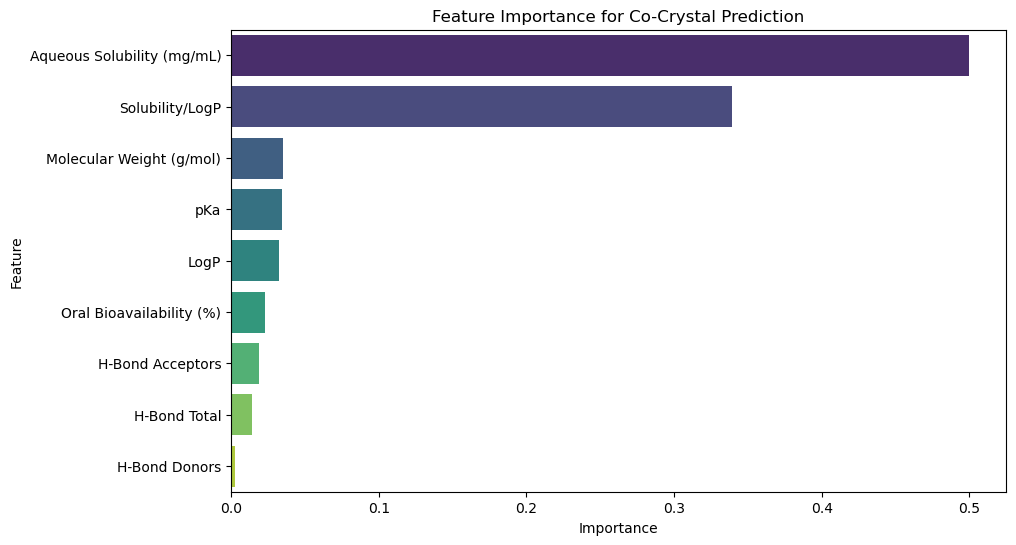

In [99]:
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette='viridis')
plt.title('Feature Importance for Co-Crystal Prediction')
plt.show()

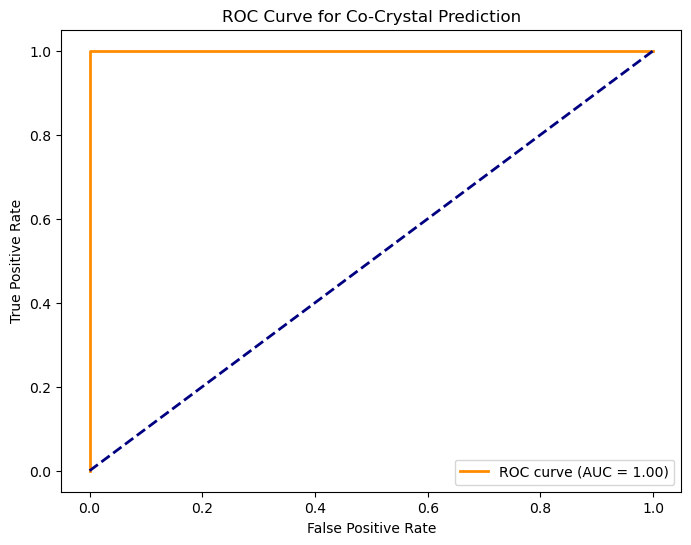

In [101]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Co-Crystal Prediction')
plt.legend(loc="lower right")
plt.show()

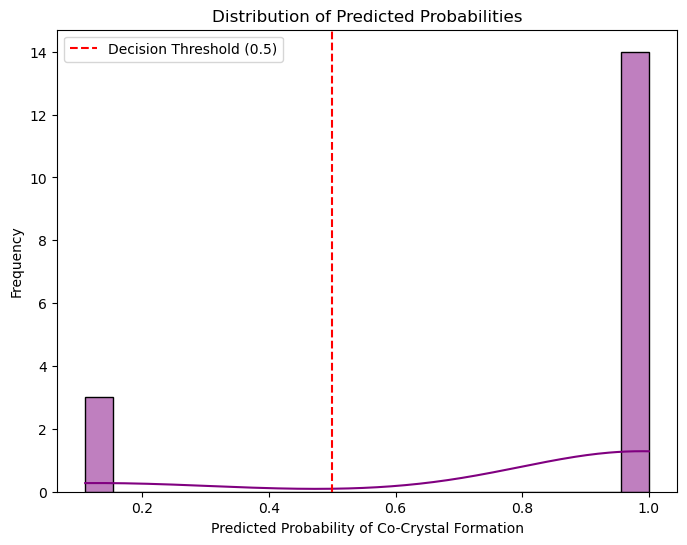

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(y_proba, bins=20, kde=True, color='purple')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel('Predicted Probability of Co-Crystal Formation')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

In [105]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [107]:
import plotly.express as px

fig = px.scatter_3d(df, x='LogP', y='Aqueous Solubility (mg/mL)', z='H-Bond Donors',
                    color='CoCrystal_Formed', symbol='CoCrystal_Formed',
                    title='3D Visualization of Key Features')
fig.show()

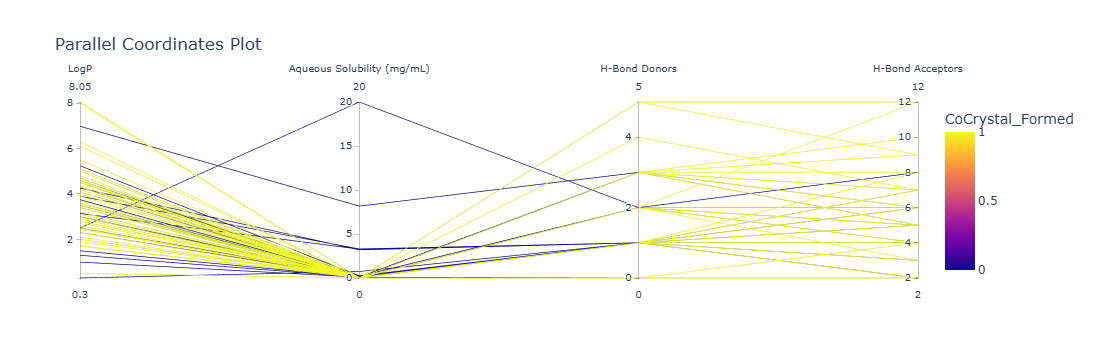

In [109]:
fig = px.parallel_coordinates(df, color='CoCrystal_Formed',
                              dimensions=['LogP', 'Aqueous Solubility (mg/mL)', 'H-Bond Donors', 'H-Bond Acceptors'],
                              title='Parallel Coordinates Plot')
fig.show()

In [115]:
# Generate predictions and probabilities
test_results = pd.DataFrame({
    "Drug Name": X_test["Albendazole"],
    "Predicted Probability": model.predict_proba(X_test_scaled)[:, 1],
    "Predicted Class": y_pred,
    "Actual Class": y_test
})

# Save predictions to CSV
test_results.to_csv("bcs class 2 database.csv", encoding='latin1', index=False)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

KeyError: 'Albendazole\t'

In [1]:
from graphviz import Digraph

# Create Digraph object
flowchart = Digraph('DatasetProcessingWorkflow', format='png')
flowchart.attr(rankdir='TB', size='8')

# Define node styles
flowchart.attr('node', shape='box', style='filled', fillcolor='#E8F1FA', fontname='Helvetica')

# Step 1: Data Collection
flowchart.node('1', '''1. Data Collection
- Sources: CSD, Literature, In-house
- Positive & Negative samples''')

# Step 2: Data Cleaning and Preprocessing
flowchart.node('2', '''2. Data Cleaning & Pre-processing
- Remove duplicates, invalid SMILES
- Handle missing values/outliers
- Standardize (canonical SMILES, protonation)
- Balance data (SMOTE/undersampling)''')

# Step 3: Feature Extraction
flowchart.node('3', '''3. Feature Extraction
- Molecular descriptors (RDKit, PaDEL)
- Interaction descriptors
- Fingerprints / Graph embeddings
- Normalize & filter features''')

# Step 4: Dataset Formatting
flowchart.node('4', '''4. Dataset Formatting
- Combine features & labels
- Final table: (API, Coformer, Label)
- Split: Train / Validation / Test''')

# Step 5: Data Augmentation (Optional)
flowchart.node('5', '''5. Optional Data Augmentation
- Virtual screening
- Conformer/Tautomer generation''')

# Define arrows
flowchart.edges([('1', '2'), ('2', '3'), ('3', '4'), ('4', '5')])

# Render the flowchart
flowchart.render('cocrystal_dataset_workflow', view=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [3]:
pip install graphviz


In [3]:
from graphviz import Digraph

# Create Digraph object
flowchart = Digraph('DatasetProcessingWorkflow', format='png')
flowchart.attr(rankdir='TB', size='8')

# Define node styles
flowchart.attr('node', shape='box', style='filled', fillcolor='#E8F1FA', fontname='Helvetica')

# Step 1: Data Collection
flowchart.node('1', '''1. Data Collection
- Sources: CSD, Literature, In-house
- Positive & Negative samples''')

# Step 2: Data Cleaning and Preprocessing
flowchart.node('2', '''2. Data Cleaning & Pre-processing
- Remove duplicates, invalid SMILES
- Handle missing values/outliers
- Standardize (canonical SMILES, protonation)
- Balance data (SMOTE/undersampling)''')

# Step 3: Feature Extraction
flowchart.node('3', '''3. Feature Extraction
- Molecular descriptors (RDKit, PaDEL)
- Interaction descriptors
- Fingerprints / Graph embeddings
- Normalize & filter features''')

# Step 4: Dataset Formatting
flowchart.node('4', '''4. Dataset Formatting
- Combine features & labels
- Final table: (API, Coformer, Label)
- Split: Train / Validation / Test''')

# Step 5: Data Augmentation (Optional)
flowchart.node('5', '''5. Optional Data Augmentation
- Virtual screening
- Conformer/Tautomer generation''')

# Define arrows
flowchart.edges([('1', '2'), ('2', '3'), ('3', '4'), ('4', '5')])

# Render the flowchart
flowchart.render('cocrystal_dataset_workflow', view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

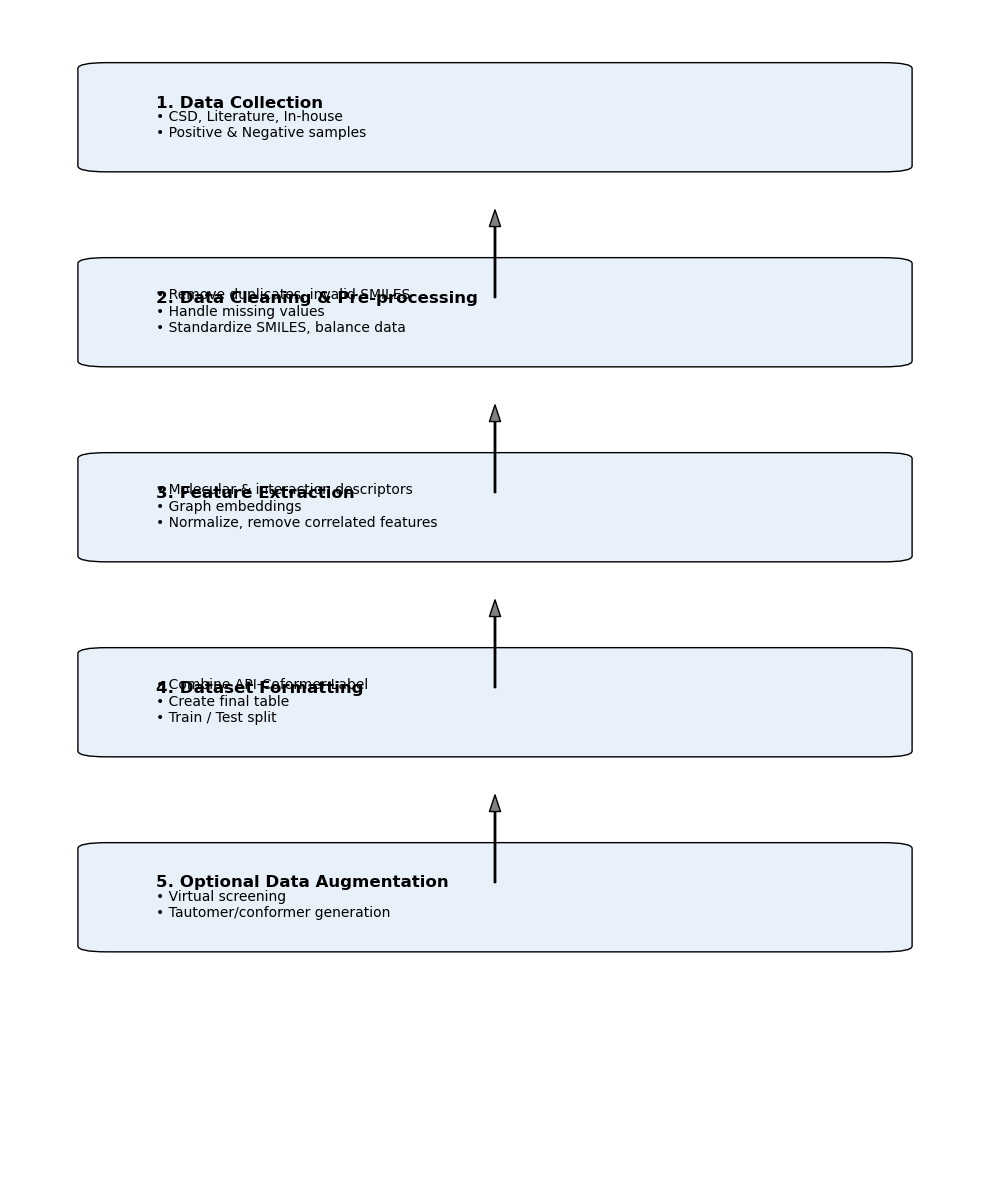

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.axis('off')  # Hide axes

# Define flowchart boxes (y positions decrease down the chart)
steps = [
    ("1. Data Collection", "• CSD, Literature, In-house\n• Positive & Negative samples"),
    ("2. Data Cleaning & Pre-processing", "• Remove duplicates, invalid SMILES\n• Handle missing values\n• Standardize SMILES, balance data"),
    ("3. Feature Extraction", "• Molecular & interaction descriptors\n• Graph embeddings\n• Normalize, remove correlated features"),
    ("4. Dataset Formatting", "• Combine API-Coformer-Label\n• Create final table\n• Train / Test split"),
    ("5. Optional Data Augmentation", "• Virtual screening\n• Tautomer/conformer generation")
]

# Draw rectangles with annotations
y = 55
for title, content in steps:
    ax.add_patch(patches.FancyBboxPatch((1, y - 3), 8, 5,
                                        boxstyle="round,pad=0.3",
                                        edgecolor='black',
                                        facecolor='#E8F1FA'))
    ax.text(1.5, y, title, fontsize=12, fontweight='bold')
    ax.text(1.5, y - 1.5, content, fontsize=10)
    y -= 10

# Draw arrows between steps
for i in range(5 - 1):
    ax.annotate('', xy=(5, 50 - i * 10), xytext=(5, 45 - i * 10),
                arrowprops=dict(facecolor='gray', shrink=0.05, width=1, headwidth=8))

plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 70)
ax.axis('off')  # Hide axes

# Define flowchart content
steps = [
    ("1. Data Collection", 
     "• CSD, Literature, In-house\n• Positive & Negative samples"),
    
    ("2. Data Cleaning & Pre-processing", 
     "• Remove duplicates, invalid SMILES\n• Handle missing values and outliers\n• Standardize SMILES, balance dataset"),
    
    ("3. Feature Extraction", 
     "• Molecular descriptors (RDKit, PaDEL)\n• Interaction & structural features\n• Normalize & remove redundancy"),
    
    ("4. Dataset Formatting", 
     "• Combine API, Coformer, Label\n• Final dataset table\n• Split into Train/Validation/Test"),
    
    ("5. Optional Data Augmentation", 
     "• Virtual screening\n• Tautomer & Conformer generation")
]

# Box placement settings
box_height = 8
box_width = 8
start_y = 60
gap = 12

# Draw boxes and arrows
for i, (title, content) in enumerate(steps):
    y = start_y - i * gap
    # Box
    ax.add_patch(patches.FancyBboxPatch(
        (1, y - box_height + 1), box_width, box_height,
        boxstyle="round,pad=0.4", edgecolor='black', facecolor='#E8F1FA'))
    
    # Title and content
    ax.text(1.5, y, title, fontsize=12, fontweight='bold', va='top')
    ax.text(1.5, y - 1.8, content, fontsize=10, va='top')
    
    # Arrow
    if i < len(steps) - 1:
        ax.annotate('', xy=(5, y - box_height + 0.5), xytext=(5, y - gap + box_height - 0.5),
                    arrowprops=dict


SyntaxError: incomplete input (3845627817.py, line 49)

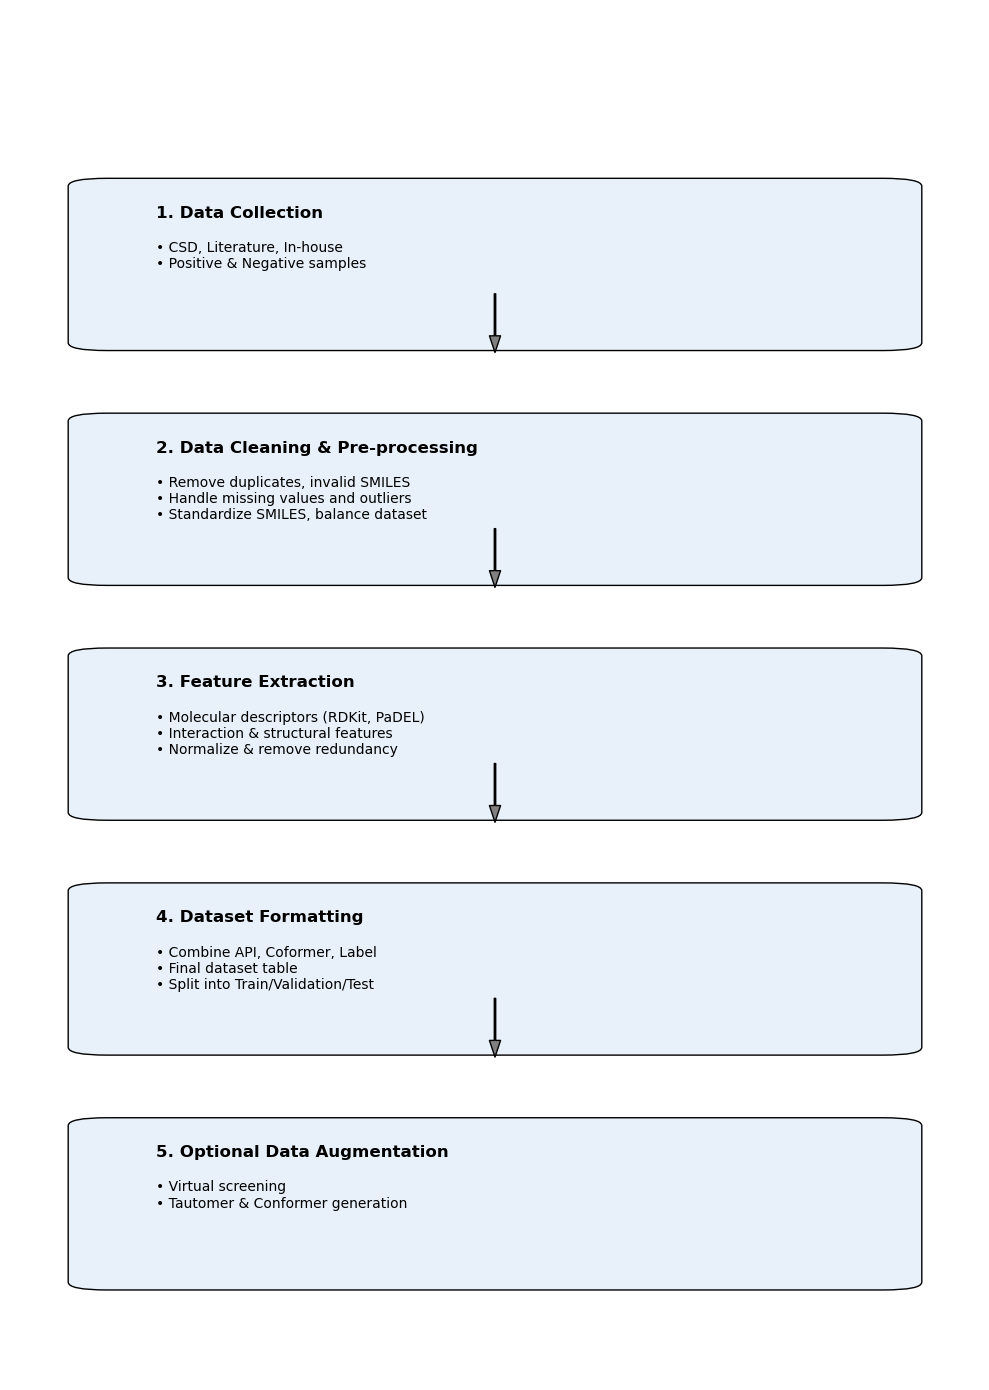

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 70)
ax.axis('off')  # Hide axes

# Define flowchart content
steps = [
    ("1. Data Collection", 
     "• CSD, Literature, In-house\n• Positive & Negative samples"),
    
    ("2. Data Cleaning & Pre-processing", 
     "• Remove duplicates, invalid SMILES\n• Handle missing values and outliers\n• Standardize SMILES, balance dataset"),
    
    ("3. Feature Extraction", 
     "• Molecular descriptors (RDKit, PaDEL)\n• Interaction & structural features\n• Normalize & remove redundancy"),
    
    ("4. Dataset Formatting", 
     "• Combine API, Coformer, Label\n• Final dataset table\n• Split into Train/Validation/Test"),
    
    ("5. Optional Data Augmentation", 
     "• Virtual screening\n• Tautomer & Conformer generation")
]

# Box placement settings
box_height = 8
box_width = 8
start_y = 60
gap = 12

# Draw boxes and arrows
for i, (title, content) in enumerate(steps):
    y = start_y - i * gap
    # Box
    ax.add_patch(patches.FancyBboxPatch(
        (1, y - box_height + 1), box_width, box_height,
        boxstyle="round,pad=0.4", edgecolor='black', facecolor='#E8F1FA'))
    
    # Title and content
    ax.text(1.5, y, title, fontsize=12, fontweight='bold', va='top')
    ax.text(1.5, y - 1.8, content, fontsize=10, va='top')
    
    # Arrow
    if i < len(steps) - 1:
        ax.annotate('', xy=(5, y - box_height + 0.5), xytext=(5, y - gap + box_height - 0.5),
                    arrowprops=dict(facecolor='gray', width=1, headwidth=8))

plt.tight_layout()
plt.show()


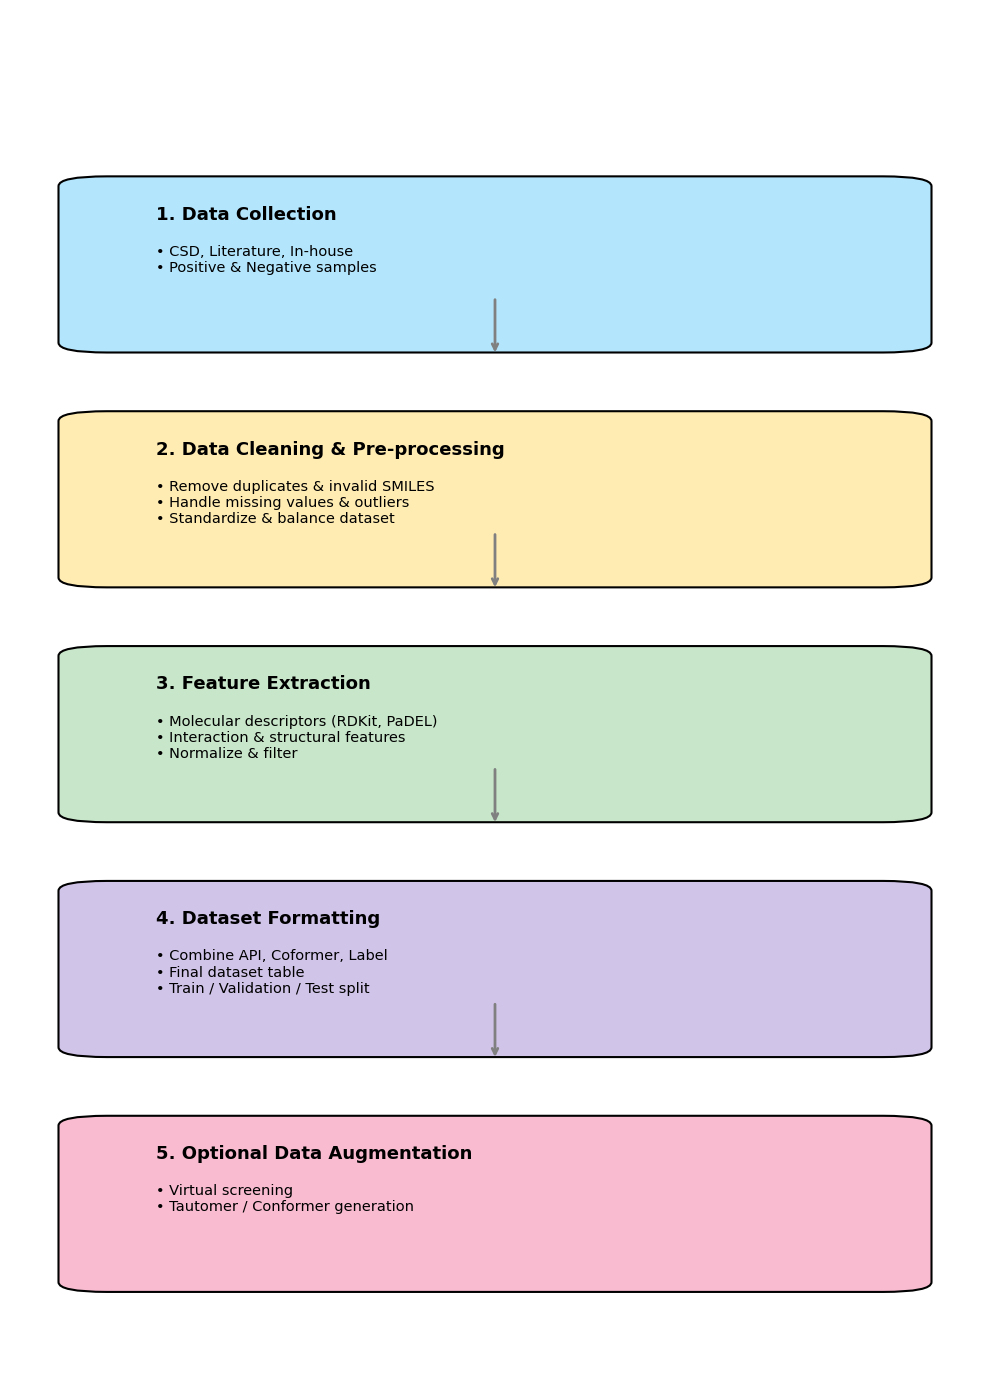

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 70)
ax.axis('off')  # Hide axes

# Define flowchart content
steps = [
    ("1. Data Collection", 
     "• CSD, Literature, In-house\n• Positive & Negative samples", '#B3E5FC'),
    
    ("2. Data Cleaning & Pre-processing", 
     "• Remove duplicates & invalid SMILES\n• Handle missing values & outliers\n• Standardize & balance dataset", '#FFECB3'),
    
    ("3. Feature Extraction", 
     "• Molecular descriptors (RDKit, PaDEL)\n• Interaction & structural features\n• Normalize & filter", '#C8E6C9'),
    
    ("4. Dataset Formatting", 
     "• Combine API, Coformer, Label\n• Final dataset table\n• Train / Validation / Test split", '#D1C4E9'),
    
    ("5. Optional Data Augmentation", 
     "• Virtual screening\n• Tautomer / Conformer generation", '#F8BBD0')
]

# Box placement settings
box_height = 8
box_width = 8
start_y = 60
gap = 12

# Draw boxes and arrows
for i, (title, content, color) in enumerate(steps):
    y = start_y - i * gap
    # Box
    ax.add_patch(patches.FancyBboxPatch(
        (1, y - box_height + 1), box_width, box_height,
        boxstyle="round,pad=0.5", edgecolor='black', facecolor=color, linewidth=1.5))
    
    # Text
    ax.text(1.5, y, title, fontsize=13, fontweight='bold', va='top')
    ax.text(1.5, y - 2, content, fontsize=10.5, va='top')
    
    # Arrows (if not the last box)
    if i < len(steps) - 1:
        ax.annotate(
            '', 
            xy=(5, y - box_height + 0.5), 
            xytext=(5, y - gap + box_height - 0.8),
            arrowprops=dict(
                arrowstyle="->", 
                lw=2, 
                color='gray',
                shrinkA=0, shrinkB=0
            )
        )

plt.tight_layout()
plt.show()


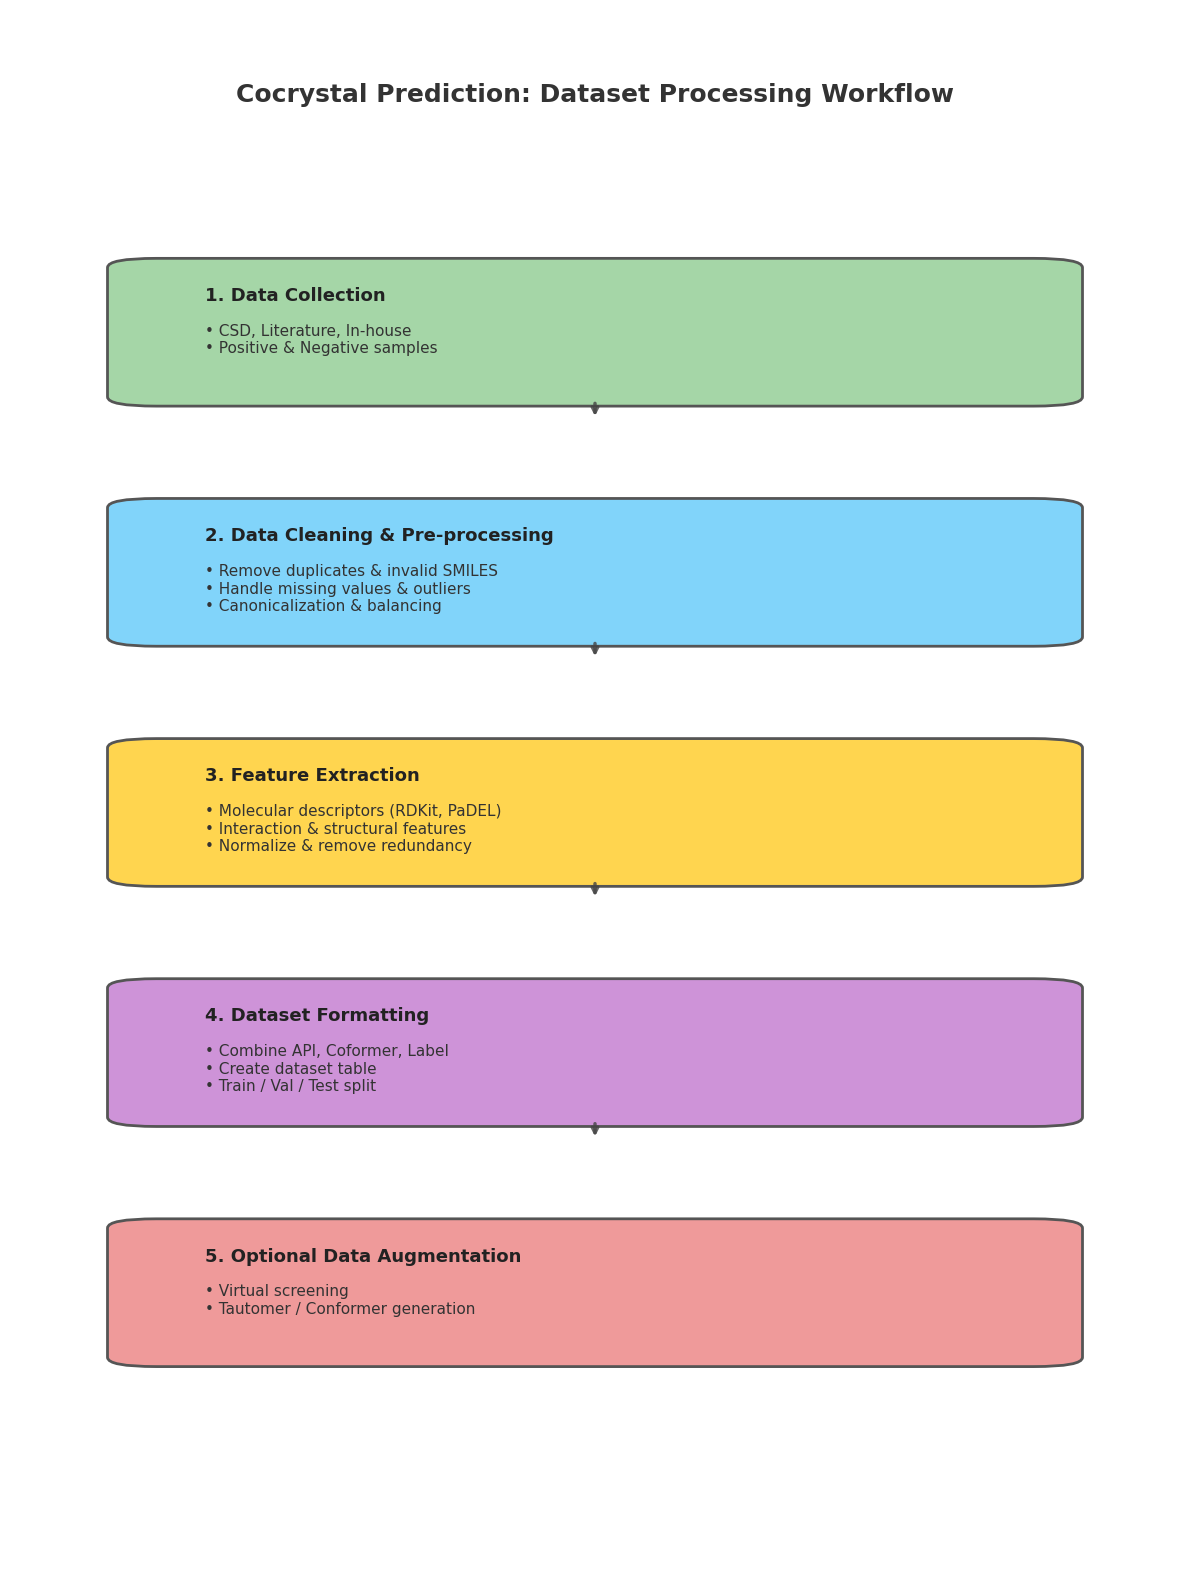

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 16))
ax.set_xlim(0, 12)
ax.set_ylim(0, 85)
ax.axis('off')  # Hide axes

# Title
ax.text(6, 80, "Cocrystal Prediction: Dataset Processing Workflow",
        ha='center', fontsize=18, fontweight='bold', color='#333333')

# Define steps with colors
steps = [
    ("1. Data Collection", 
     "• CSD, Literature, In-house\n• Positive & Negative samples", '#A5D6A7'),
    
    ("2. Data Cleaning & Pre-processing", 
     "• Remove duplicates & invalid SMILES\n• Handle missing values & outliers\n• Canonicalization & balancing", '#81D4FA'),
    
    ("3. Feature Extraction", 
     "• Molecular descriptors (RDKit, PaDEL)\n• Interaction & structural features\n• Normalize & remove redundancy", '#FFD54F'),
    
    ("4. Dataset Formatting", 
     "• Combine API, Coformer, Label\n• Create dataset table\n• Train / Val / Test split", '#CE93D8'),
    
    ("5. Optional Data Augmentation", 
     "• Virtual screening\n• Tautomer / Conformer generation", '#EF9A9A')
]

# Box dimensions
box_width = 9
box_height = 7
start_y = 70
gap = 13

# Draw the boxes and arrows
for i, (title, content, color) in enumerate(steps):
    y = start_y - i * gap

    # Box
    box = patches.FancyBboxPatch(
        (1.5, y - box_height + 1), box_width, box_height,
        boxstyle="round,pad=0.5",
        edgecolor='#555', facecolor=color,
        linewidth=2)
    ax.add_patch(box)

    # Text inside box
    ax.text(2, y, title, fontsize=13, fontweight='bold', va='top', color='#222222')
    ax.text(2, y - 2, content, fontsize=11, va='top', color='#333333')

    # Arrow (except after last box)
    if i < len(steps) - 1:
        arrow_start_y = y - box_height + 0.8
        arrow_end_y = y - gap + box_height - 1.2
        ax.annotate(
            '', 
            xy=(6, arrow_end_y), 
            xytext=(6, arrow_start_y),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#444', alpha=0.8)
        )

# Show
plt.tight_layout()
plt.show()


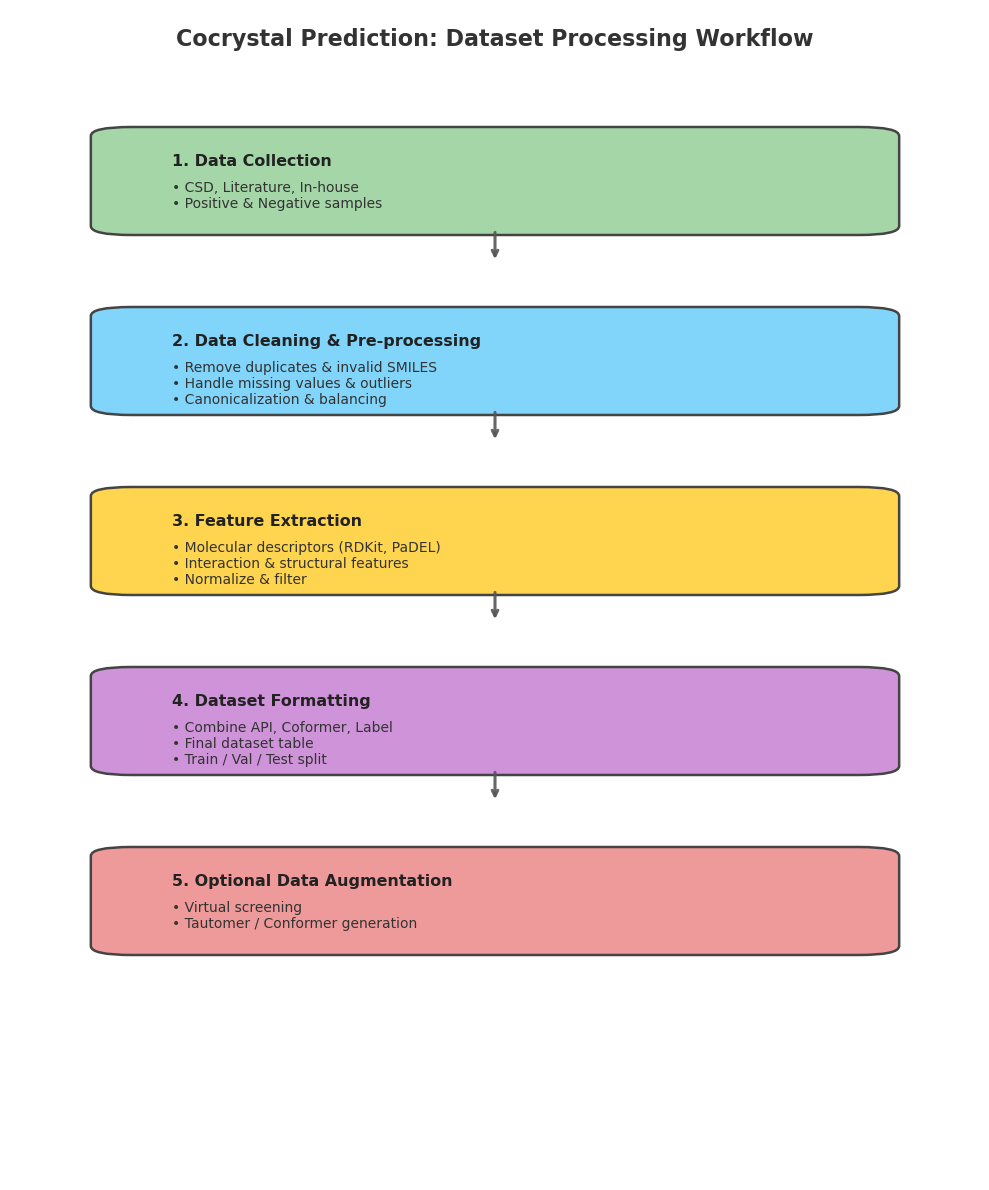

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(0, 12)
ax.set_ylim(0, 65)
ax.axis('off')  # Hide axes

# Title
ax.text(6, 63, "Cocrystal Prediction: Dataset Processing Workflow",
        ha='center', fontsize=16, fontweight='bold', color='#333333')

# Define steps with colors
steps = [
    ("1. Data Collection", 
     "• CSD, Literature, In-house\n• Positive & Negative samples", '#A5D6A7'),
    
    ("2. Data Cleaning & Pre-processing", 
     "• Remove duplicates & invalid SMILES\n• Handle missing values & outliers\n• Canonicalization & balancing", '#81D4FA'),
    
    ("3. Feature Extraction", 
     "• Molecular descriptors (RDKit, PaDEL)\n• Interaction & structural features\n• Normalize & filter", '#FFD54F'),
    
    ("4. Dataset Formatting", 
     "• Combine API, Coformer, Label\n• Final dataset table\n• Train / Val / Test split", '#CE93D8'),
    
    ("5. Optional Data Augmentation", 
     "• Virtual screening\n• Tautomer / Conformer generation", '#EF9A9A')
]

# Box dimensions
box_width = 9
box_height = 5
start_y = 57
gap = 10  # smaller vertical gap

# Draw the boxes and arrows
for i, (title, content, color) in enumerate(steps):
    y = start_y - i * gap

    # Draw box
    ax.add_patch(patches.FancyBboxPatch(
        (1.5, y - box_height + 1), box_width, box_height,
        boxstyle="round,pad=0.5",
        edgecolor='#444', facecolor=color,
        linewidth=1.8))

    # Text inside box
    ax.text(2, y, title, fontsize=11.5, fontweight='bold', va='top', color='#222222')
    ax.text(2, y - 1.5, content, fontsize=10, va='top', color='#333333')

    # Draw arrow (except after last box)
    if i < len(steps) - 1:
        arrow_start_y = y - box_height + 0.8
        arrow_end_y = y - gap + box_height - 1.0
        ax.annotate(
            '', 
            xy=(6, arrow_end_y), 
            xytext=(6, arrow_start_y),
            arrowprops=dict(arrowstyle='->', lw=2.2, color='#555', alpha=0.9)
        )

plt.tight_layout()
plt.show()
